Simulation completed.

Unable to complete summary:
axis 1 is out of bounds for array of dimension 1
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.41295098], Energy = [-0.82415849]
Minimum 2: Position = [-2.27150859], Energy = [-1.672135]

Approximate saddle points between minima:
Saddle 1: Position = [-0.35786783], Energy = [-0.39138015]

Computational statistics:
	Energy evaluations: 210
	Force evaluations: 0
	Total steps: 45

Verification against reference:
True minima found: 2/5
Missed minima at positions:
[2.71638]
[8.69999]
[10.35518]

Verification against reference (saddles):
True saddles found: 0/4
Missed saddles at positions:
[-1.2645]
[1.94219]
[4.55508]
[9.7913]
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.41295098], Energy = [-0.82415849]
Minimum 2: Position = [-2.27150859], Energy = [-1.672135]

Approximate saddle points between minima:
Saddle 1: Position = [-0.35786783], Energy = [-0.39138015]

Computational statis

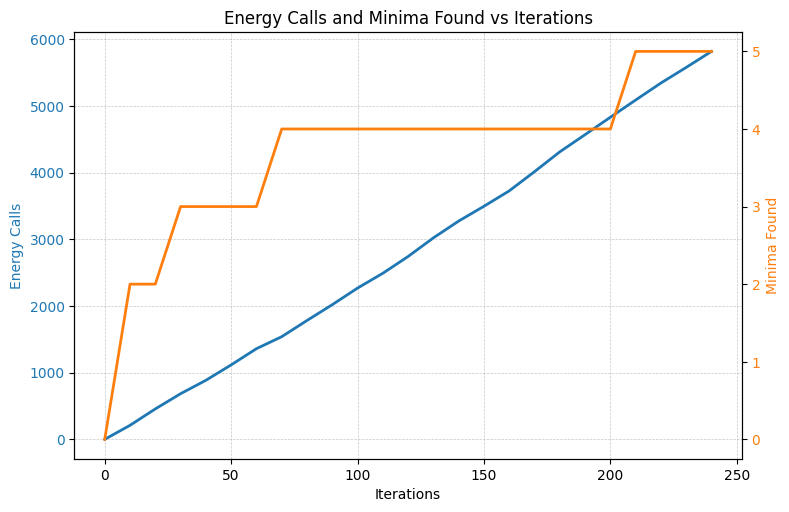

In [ ]:
from ca_abc import *
from potentials import *
from optimizers import *

import matplotlib.pyplot as plt
import numpy as np 


minima_found = []
force_calls = []
energy_calls = []
iters = range(0, 250, 10)
for iter in iters:
    np.random.seed(2)
    potential = Complex1D()
    abc = CurvatureAdaptiveABC(
        potential=potential,
        starting_position=[0.0],
        curvature_method="bfgs", 
        dump_every=10000,

        perturb_type="fixed",
        default_perturbation_size=0.05,
        scale_perturb_by_curvature=False,
        random_perturb_every=100,
    
        bias_height_type="fixed",
        default_bias_height=0.5,
        min_bias_height= 0.05,
        max_bias_height= 4,
        curvature_bias_height_scale=0.001,

        bias_covariance_type="fixed",
        default_bias_covariance=0.05,
        min_bias_covariance= 0.01/10,
        max_bias_covariance= 0.01*20,
        curvature_bias_covariance_scale=1/6,
        
        max_descent_steps=100, 
        descent_convergence_threshold=1e-4,
        remove_rotation_translation=False,
    )

    myopt = ScipyOptimizer(abc, "BFGS")

    abc.run(max_iterations=iter, optimizer=myopt, verbose=False)
    minima_found.append(len(abc.minima))
    force_calls.append(abc.potential.force_calls)
    energy_calls.append(abc.potential.energy_calls)

# fig, ax1 = plt.subplots(figsize=(8, 5))

# color1 = 'tab:blue'
# ax1.set_xlabel('Iterations')
# ax1.set_ylabel('Energy Calls', color=color1)
# ax1.plot(iters, energy_calls, color=color1, label='Energy Calls', linewidth=2)
# ax1.tick_params(axis='y', labelcolor=color1)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ax2 = ax1.twinx()
# color2 = 'tab:orange'
# ax2.set_ylabel('Minima Found', color=color2)
# ax2.plot(iters, minima_found, color=color2, label='Minima Found', linewidth=2)
# ax2.tick_params(axis='y', labelcolor=color2)

# fig.tight_layout()
# plt.title('Energy Calls and Minima Found vs Iterations')
# plt.show()

plt.figure(figsize=(8, 5))
plt.plot(energy_calls, minima_found, linewidth=2)
plt.xlabel('Energy Calls')
plt.ylabel('Minima Found')
plt.title('Minima Found vs Energy Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

Simulation completed.

Unable to complete summary:
axis 1 is out of bounds for array of dimension 1
[1.] 1.0
[1.] 0.7001535617953414
[1.] 0.4537127743040718
[1.] 0.2004706403515905
[1.] 0.03936250762820365
[1.] 0.1795024862800978
[1.] 0.09624740540327976
[1.] 0.22215039696564265
[1.] 0.11405689438691816
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.41295098], Energy = [-0.82415849]

Computational statistics:
	Energy evaluations: 141
	Force evaluations: 0
	Total steps: 43

Verification against reference:
True minima found: 1/5
Missed minima at positions:
[-2.27151]
[2.71638]
[8.69999]
[10.35518]

Verification against reference (saddles):
True saddles found: 0/4
Missed saddles at positions:
[-1.2645]
[1.94219]
[4.55508]
[9.7913]
[1.] 1.0
[1.] 0.7001535617953414
[1.] 0.4537127743040718
[1.] 0.2004706403515905
[1.] 0.03936250762820365
[1.] 0.1795024862800978
[1.] 0.09624740540327976
[1.] 0.22215039696564265
[1.] 0.11405689438691816
[1.] 0.21776405646798044
[1.]

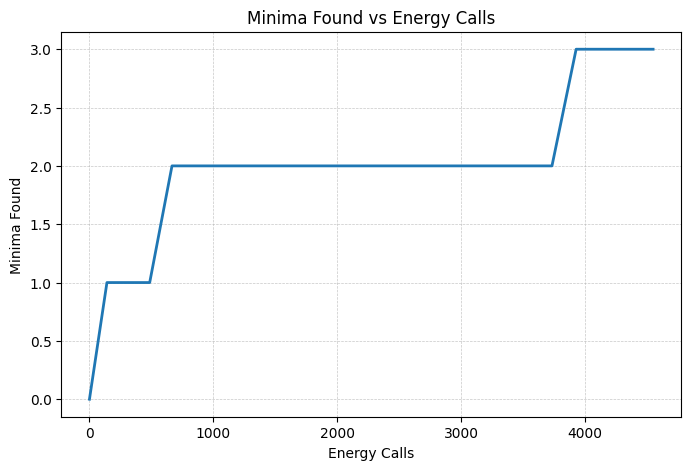

In [6]:
from ca_abc import *
from potentials import *
from optimizers import *

import matplotlib.pyplot as plt
import numpy as np 


minima_found = []
force_calls = []
energy_calls = []
iters = range(0, 250, 10)
for iter in iters:
    np.random.seed(2)
    potential = Complex1D()
    abc = CurvatureAdaptiveABC(
        potential=potential,
        starting_position=[0.0],
        curvature_method="bfgs", 
        dump_every=10000,

        perturb_type="adaptive",
        default_perturbation_size=0.05,
        scale_perturb_by_curvature=False,
        random_perturb_every=100,
    
        bias_height_type="adaptive",
        default_bias_height=0.5,
        min_bias_height= 0.05,
        max_bias_height= 4,
        curvature_bias_height_scale=0.001,

        bias_covariance_type="adaptive",
        default_bias_covariance=0.05,
        min_bias_covariance= 0.01/10,
        max_bias_covariance= 0.01*20,
        curvature_bias_covariance_scale=1/6,
        
        max_descent_steps=100, 
        descent_convergence_threshold=1e-4,
        remove_rotation_translation=False,
    )

    myopt = ScipyOptimizer(abc, "BFGS")

    abc.run(max_iterations=iter, optimizer=myopt, verbose=False)
    minima_found.append(len(abc.minima))
    force_calls.append(abc.potential.force_calls)
    energy_calls.append(abc.potential.energy_calls)

# fig, ax1 = plt.subplots(figsize=(8, 5))

# color1 = 'tab:blue'
# ax1.set_xlabel('Iterations')
# ax1.set_ylabel('Energy Calls', color=color1)
# ax1.plot(iters, energy_calls, color=color1, label='Energy Calls', linewidth=2)
# ax1.tick_params(axis='y', labelcolor=color1)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ax2 = ax1.twinx()
# color2 = 'tab:orange'
# ax2.set_ylabel('Minima Found', color=color2)
# ax2.plot(iters, minima_found, color=color2, label='Minima Found', linewidth=2)
# ax2.tick_params(axis='y', labelcolor=color2)

# fig.tight_layout()
# plt.title('Energy Calls and Minima Found vs Iterations')
# plt.show()

plt.figure(figsize=(8, 5))
plt.plot(energy_calls, minima_found, linewidth=2)
plt.xlabel('Energy Calls')
plt.ylabel('Minima Found')
plt.title('Minima Found vs Energy Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()